In [1]:
 #%%

# google colab configurations 
# these might change

# torch imports
import torch

# import utils
import json
from datetime import date
import os

google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 

    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


    COLAB_CONFIG = '1o5nZNVmNBq3UQRxwYIwOATX0c0GyHPRN'
    COLAB_CONFIG_FILE ='colab_config.json'

    colab_json = drive.CreateFile({'id': COLAB_CONFIG})
    colab_json.GetContentFile(COLAB_CONFIG_FILE)

    with open(COLAB_CONFIG_FILE) as f:
      temp = f.read()
    colab_config = json.loads(temp)

    for key in colab_config:
      globals()[key] = drive.CreateFile({"id":colab_config[key]['id']})
      globals()[key].GetContentFile(colab_config[key]['file'])

    from trainer import RegressionTrainer
    from datageneration import DataGenerator
    from helpers import Helper, Plotter
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')

    # custom imports
    from cnp.trainer import RegressionTrainer
    from cnp.datageneration import DataGenerator
    from cnp.helpers import Helper

Running on Colab?
no


In [2]:
# custom imports
from experiment import Experiment
from datageneration import DataGenerator
from helpers import Helper


# torch imports
import torch
from torch.utils import data


# import utils
import json
from datetime import date
import os
import sys

# common ml libraries
import pandas as pd
import numpy as np

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_director = ''
else:
    config_director = 'configs/'

with open(f'{config_director}config.json') as f:
    file = f.read()
    default_conf = json.loads(file)


In [3]:
# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    conf['default']['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')

No GPU available, training on CPU


## Generating a dataset

In [54]:
# reading in the data 
CONFIGURATION='height_weight_configs'

BASE_DIR = default_conf[CONFIGURATION]['dataset_params']['base_dir']
DATA_DIR = default_conf[CONFIGURATION]['dataset_params']['data_dir']
EXTENSION = default_conf[CONFIGURATION]['dataset_params']['extension']
DATA_FILE = default_conf[CONFIGURATION]['dataset_params']['data_file']

df = pd.read_csv(os.path.join(BASE_DIR, DATA_DIR, EXTENSION, DATA_FILE))
df = df.sample(frac=1)
# df['Weight'] = df['Weight'] - df['Weight'].mean()

func_x = df[[col for col in df.columns if col =='Target']].to_numpy()
func_x = torch.from_numpy(func_x).unsqueeze(-1).type(torch.FloatTensor)
func_x = func_x.view(100,100,1)

x_values = df[[col for col in df.columns if col != 'Target']].to_numpy()
x_values = torch.from_numpy(x_values).unsqueeze(-1).type(torch.FloatTensor)
x_values = x_values.view(100,100,1)

tensor(-2.0949)

In [5]:
NUM_TRAIN = default_conf[CONFIGURATION]['data_gen_params']['num_instances_train']
NUM_VALI  = default_conf[CONFIGURATION]['data_gen_params']['num_instances_vali']

BATCH_SIZE = default_conf[CONFIGURATION]['data_gen_params']['batch_size_train']


In [6]:
random_indeces = torch.randperm(NUM_TRAIN)
train_indeces = random_indeces[:NUM_TRAIN]
vali_indeces = random_indeces[NUM_TRAIN:]


In [7]:
train_dataset = data.TensorDataset(x_values[train_indeces], func_x[train_indeces])
trainloader = data.DataLoader(train_dataset, batch_size=BATCH_SIZE)

In [8]:
vali_dataset = data.TensorDataset(x_values[train_indeces], func_x[train_indeces])
valiloader = data.DataLoader(train_dataset, batch_size=BATCH_SIZE)

In [9]:
# creating an instance of to orchestrate the training
trainer = Experiment(**default_conf[CONFIGURATION]['experiment_params'])

  0%|          | 0/200000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 147070.4375
True
 Validation loss after 0 equals 841.5740356445312


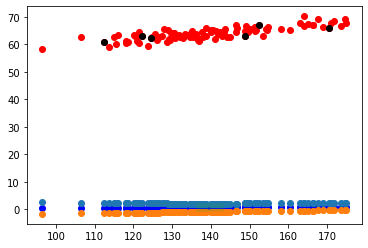

  0%|          | 992/200000 [00:06<21:24, 154.98it/s] 

Mean loss at epoch 1000 : 1.784461259841919
True
 Validation loss after 1000 equals 1.8430960178375244


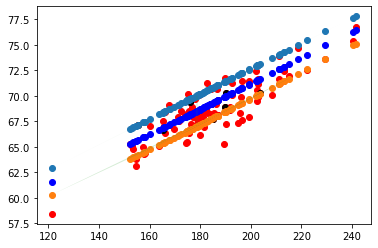

  1%|          | 1992/200000 [00:13<21:00, 157.09it/s]

Mean loss at epoch 2000 : 1.8746752738952637
True
 Validation loss after 2000 equals 1.8930206298828125


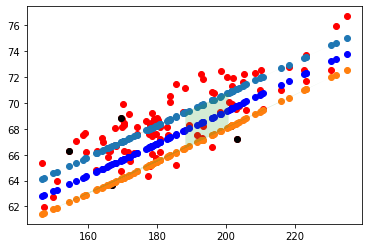

  1%|▏         | 2998/200000 [00:20<21:30, 152.68it/s]

Mean loss at epoch 3000 : 1.778974175453186
True
 Validation loss after 3000 equals 1.8337743282318115


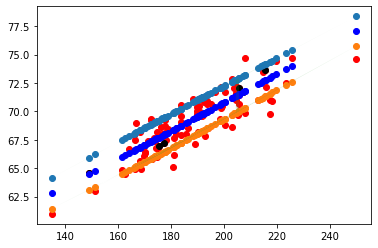

  2%|▏         | 3994/200000 [00:27<22:46, 143.45it/s]

Mean loss at epoch 4000 : 1.7836635112762451
True
 Validation loss after 4000 equals 1.913923978805542


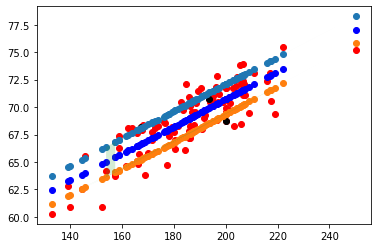

  2%|▏         | 4992/200000 [00:35<21:50, 148.76it/s]

Mean loss at epoch 5000 : 1.7305914163589478
True
 Validation loss after 5000 equals 1.9501349925994873


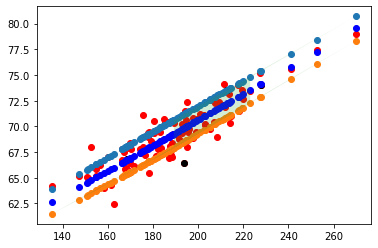

  3%|▎         | 5996/200000 [00:41<24:05, 134.22it/s]

Mean loss at epoch 6000 : 1.7515379190444946
True
 Validation loss after 6000 equals 1.8279165029525757


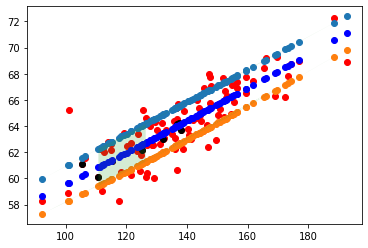

  3%|▎         | 6998/200000 [00:48<21:02, 152.84it/s]

Mean loss at epoch 7000 : 1.8173835277557373
True
 Validation loss after 7000 equals 1.839271903038025


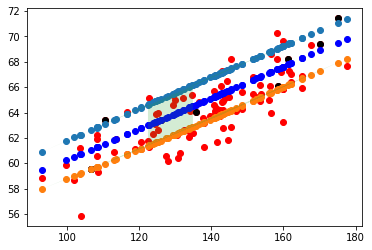

  4%|▍         | 7990/200000 [00:55<21:30, 148.82it/s]

Mean loss at epoch 8000 : 1.7542413473129272
True
 Validation loss after 8000 equals 1.8417388200759888


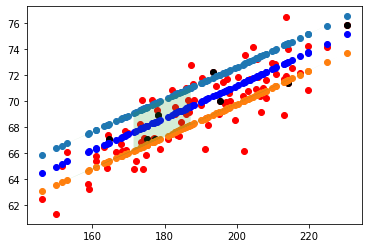

  4%|▍         | 8995/200000 [01:02<20:49, 152.93it/s]

Mean loss at epoch 9000 : 1.7974138259887695
True
 Validation loss after 9000 equals 1.8533669710159302


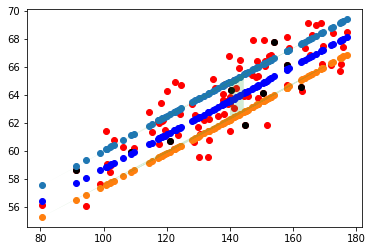

  5%|▍         | 9988/200000 [01:09<21:08, 149.74it/s]

Mean loss at epoch 10000 : 1.8576512336730957
True
 Validation loss after 10000 equals 1.860744595527649


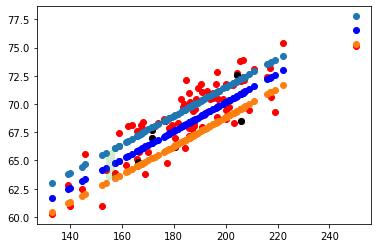

  5%|▌         | 10985/200000 [01:16<20:00, 157.49it/s]

Mean loss at epoch 11000 : 1.7962429523468018
True
 Validation loss after 11000 equals 1.868597388267517


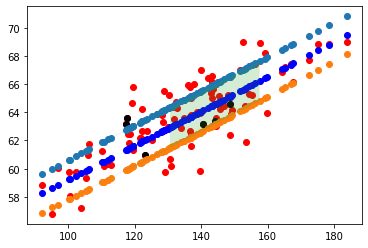

  6%|▌         | 11991/200000 [01:23<20:29, 152.86it/s]

Mean loss at epoch 12000 : 1.8102134466171265
True
 Validation loss after 12000 equals 1.8571604490280151


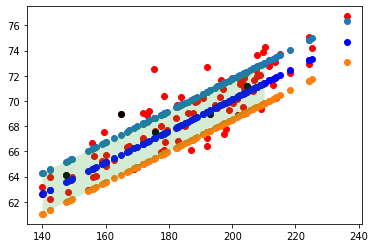

  6%|▋         | 12988/200000 [01:32<56:13, 55.43it/s] 

Mean loss at epoch 13000 : 1.7688052654266357
True
 Validation loss after 13000 equals 1.8467882871627808


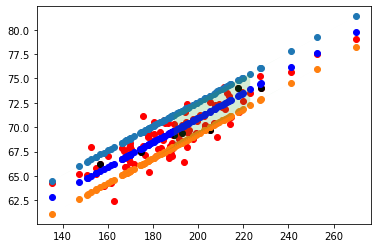

  7%|▋         | 13996/200000 [01:39<20:56, 148.08it/s] 

Mean loss at epoch 14000 : 1.7354700565338135
True
 Validation loss after 14000 equals 1.8623762130737305


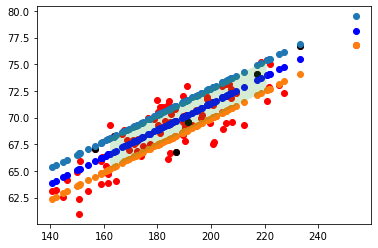

  7%|▋         | 14988/200000 [01:46<32:31, 94.80it/s] 

Mean loss at epoch 15000 : 1.7848231792449951
True
 Validation loss after 15000 equals 1.8750402927398682


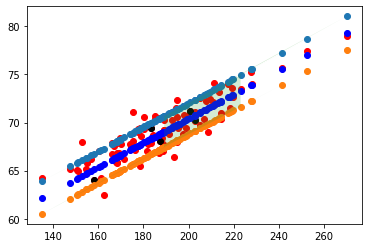

  8%|▊         | 15985/200000 [01:54<22:49, 134.37it/s]

Mean loss at epoch 16000 : 1.8463315963745117
True
 Validation loss after 16000 equals 1.8841238021850586


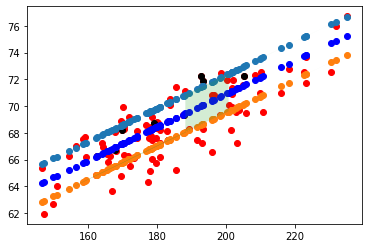

  8%|▊         | 16993/200000 [02:01<20:10, 151.18it/s]

Mean loss at epoch 17000 : 1.7448738813400269
True
 Validation loss after 17000 equals 1.923393964767456


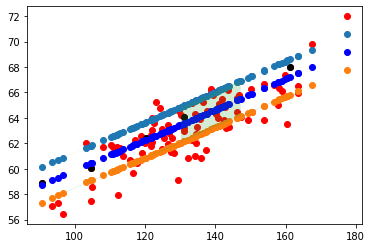

  9%|▉         | 17985/200000 [02:08<22:42, 133.55it/s]

Mean loss at epoch 18000 : 1.8182411193847656
True
 Validation loss after 18000 equals 1.8784164190292358


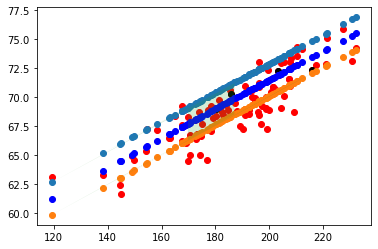

  9%|▉         | 18991/200000 [02:16<27:48, 108.46it/s]

Mean loss at epoch 19000 : 1.8386927843093872
True
 Validation loss after 19000 equals 1.9372860193252563


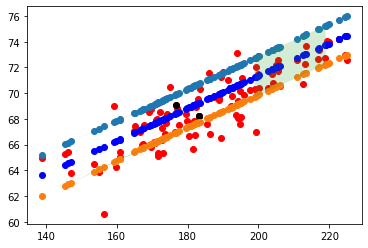

 10%|▉         | 19992/200000 [02:23<19:03, 157.36it/s]

Mean loss at epoch 20000 : 1.7808692455291748
True
 Validation loss after 20000 equals 1.962253212928772


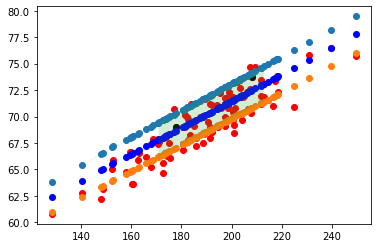

 10%|█         | 20991/200000 [02:30<18:59, 157.06it/s]

Mean loss at epoch 21000 : 1.8702688217163086
True
 Validation loss after 21000 equals 1.8940502405166626


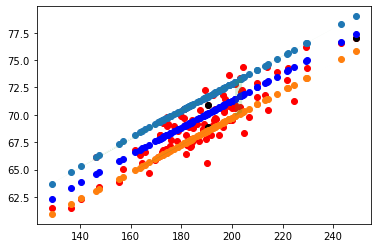

 11%|█         | 21987/200000 [02:36<18:38, 159.14it/s]

Mean loss at epoch 22000 : 1.764783501625061
True
 Validation loss after 22000 equals 1.9088761806488037


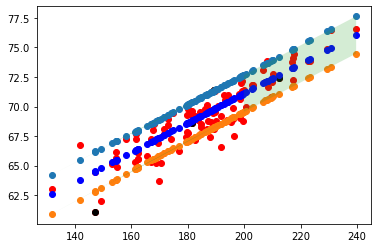

 11%|█▏        | 22996/200000 [02:43<18:37, 158.37it/s]

Mean loss at epoch 23000 : 1.8177828788757324
True
 Validation loss after 23000 equals 1.8964892625808716


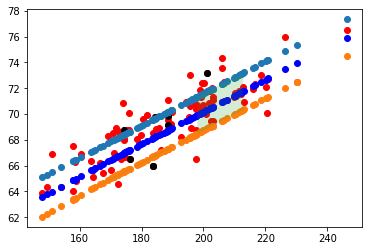

 12%|█▏        | 23985/200000 [02:49<18:50, 155.74it/s]

Mean loss at epoch 24000 : 1.8126413822174072
True
 Validation loss after 24000 equals 1.8937324285507202


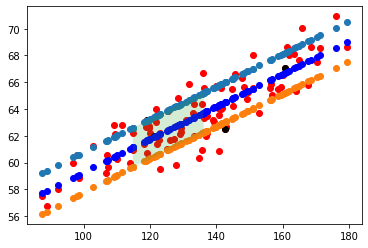

 12%|█▏        | 24998/200000 [02:56<18:50, 154.74it/s]

Mean loss at epoch 25000 : 1.7854398488998413
True
 Validation loss after 25000 equals 1.8403104543685913


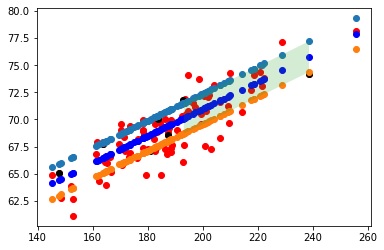

 13%|█▎        | 25992/200000 [03:02<17:41, 163.97it/s]

Mean loss at epoch 26000 : 1.7584574222564697
True
 Validation loss after 26000 equals 1.8529149293899536


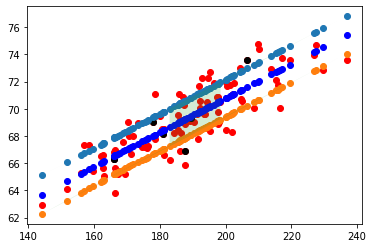

 13%|█▎        | 26988/200000 [03:09<18:33, 155.39it/s]

Mean loss at epoch 27000 : 1.7603545188903809
True
 Validation loss after 27000 equals 1.8722782135009766


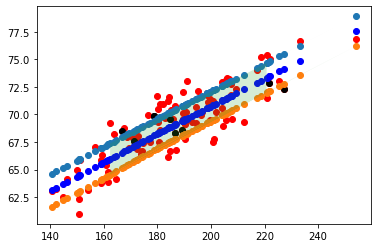

 14%|█▍        | 27997/200000 [03:21<21:09, 135.52it/s] 

Mean loss at epoch 28000 : 1.7780718803405762
True
 Validation loss after 28000 equals 1.9255024194717407


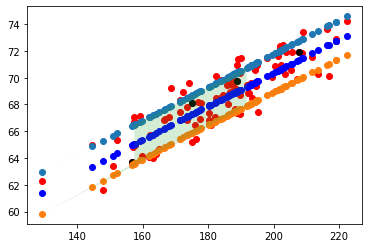

 14%|█▍        | 28998/200000 [03:36<21:29, 132.63it/s] 

Mean loss at epoch 29000 : 1.7612831592559814
True
 Validation loss after 29000 equals 1.9919906854629517


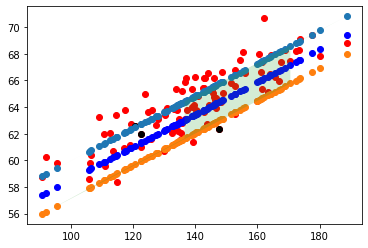

 15%|█▍        | 29993/200000 [03:57<27:08, 104.40it/s] 

Mean loss at epoch 30000 : 1.7876781225204468
True
 Validation loss after 30000 equals 1.950920820236206


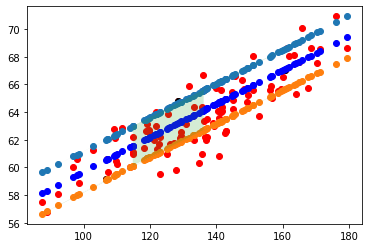

 15%|█▌        | 30113/200000 [03:59<22:29, 125.93it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes/tfm/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-219e47c01667>", line 1, in <module>
    model_weights = trainer.run_training(trainloader, valiloader=valiloader, plotting=True)
  File "/Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes/code/experiment.py", line 300, in run_training
    batch_size, target_x, target_y, context_x, contxt_idx, context_y, mu, sigma_transformed, distribution = self._prep_data(
  File "/Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes/code/experiment.py", line 210, in _prep_data
    decoding = self._decoder(target_x_stacked, encoding_stacked)
  File "/Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes/tfm/lib/python3.8/site-packages/torch/nn/modules/modu

KeyboardInterrupt: 

In [10]:
model_weights = trainer.run_training(trainloader, valiloader=valiloader, plotting=True)


